## Import Statements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from scipy import stats

pd.options.display.max_columns=25

In [92]:
data_main = pd.read_csv('Electricity_Usage_Data.csv')

In [93]:
data_main[['bill_date']] = data_main[['bill_date']].apply(pd.to_datetime)

In [94]:
data_main.loc[:,'bill_date'] = data_main['bill_date'].apply(lambda x: pd.to_datetime(f'{x.year}-{x.month}-01'))

In [95]:
viz_df = data_main.set_index('bill_date')

In [96]:
viz_df.head()

,esid,business_area,service_address,bill_type,total_due,kwh_usage
bill_date,,,,,,
2012-06-01,1008901000140050014100,2000,10518 BELLAIRE,T,73232.11,905421.0
2012-05-01,1008901000140050014100,2000,10518 BELLAIRE,T,68463.46,824107.0
2012-04-01,1008901000140050014100,2000,10518 BELLAIRE,T,80847.87,977744.0
2012-03-01,1008901000140050014100,2000,10518 BELLAIRE,T,74373.93,876838.0
2012-02-01,1008901000140050014100,2000,10518 BELLAIRE,T,74080.27,872898.0


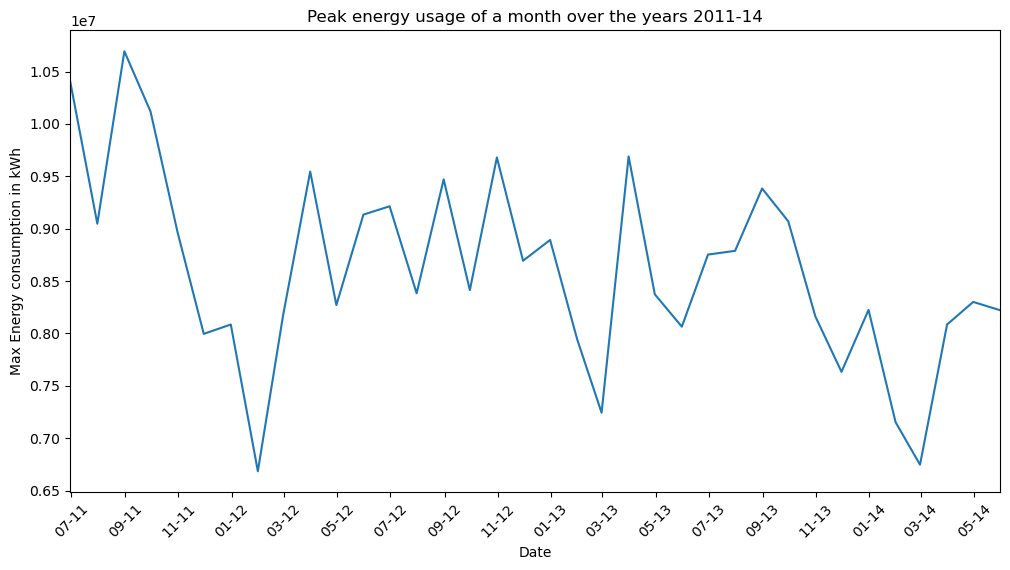

In [106]:
monthly_en = viz_df.resample('M', label = 'left')['kwh_usage'].max()
plt.figure(figsize = (12,6))

#plotting the max monthly energy consumption
plt.plot(monthly_en)
# ensuring the limits on x axis to be between the dataframe's datetime limits
plt.xlim(monthly_en.index.min(), monthly_en.index.max())
# Using matplotlib MonthLocator to be used in the xticks to mark individual months
locator = mdates.MonthLocator(bymonthday = 1, interval = 2)  # every 2 months 
fmt = mdates.DateFormatter('%m-%y') 
X = plt.gca().xaxis
# Setting the locator
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.xticks(rotation = 45)
plt.ylabel('Max Energy consumption in kWh')
plt.xlabel('Date')
plt.title('Peak energy usage of a month over the years 2011-14')
plt.show()


There is a noticable trend in the usage of energy across the months starting from 2011 to 2014.